In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
with open('prf.pkl', 'rb') as f:
    prf = pickle.load(f)

In [4]:
bayes_prf, svm_prf, ann_prf = prf

In [5]:
pd.DataFrame(bayes_prf).round(3)

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,...,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese,accuracy,macro avg,weighted avg
f1-score,0.550,0.350,0.652,0.775,0.571,0.526,0.642,0.847,0.505,0.790,...,0.872,0.694,0.465,0.661,0.449,0.717,0.543,0.724,0.634,0.716
precision,0.744,0.451,0.690,0.704,0.818,0.526,0.826,0.825,0.716,0.739,...,0.853,0.799,0.735,0.579,0.627,0.692,0.696,0.724,0.730,0.730
recall,0.436,0.286,0.619,0.863,0.438,0.526,0.526,0.870,0.390,0.848,...,0.893,0.614,0.340,0.769,0.350,0.745,0.445,0.724,0.585,0.724
support,140.000,241.000,464.000,802.000,226.000,794.000,352.000,901.000,200.000,2352.000,...,1932.000,246.000,147.000,1296.000,297.000,462.000,247.000,0.724,11933.000,11933.000


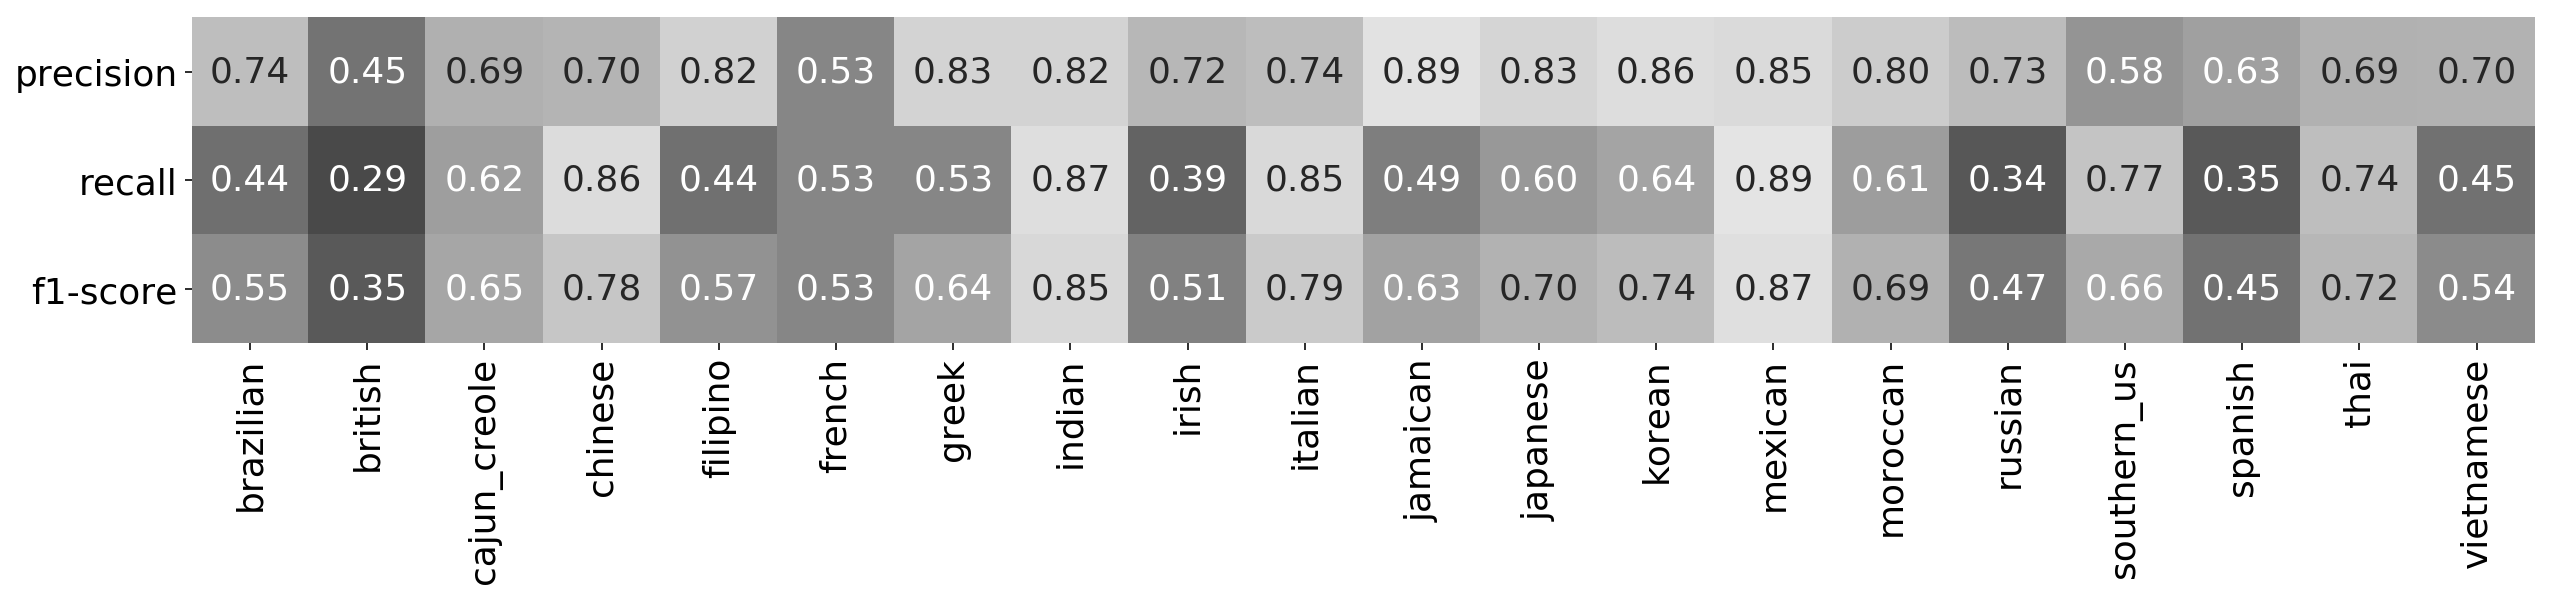

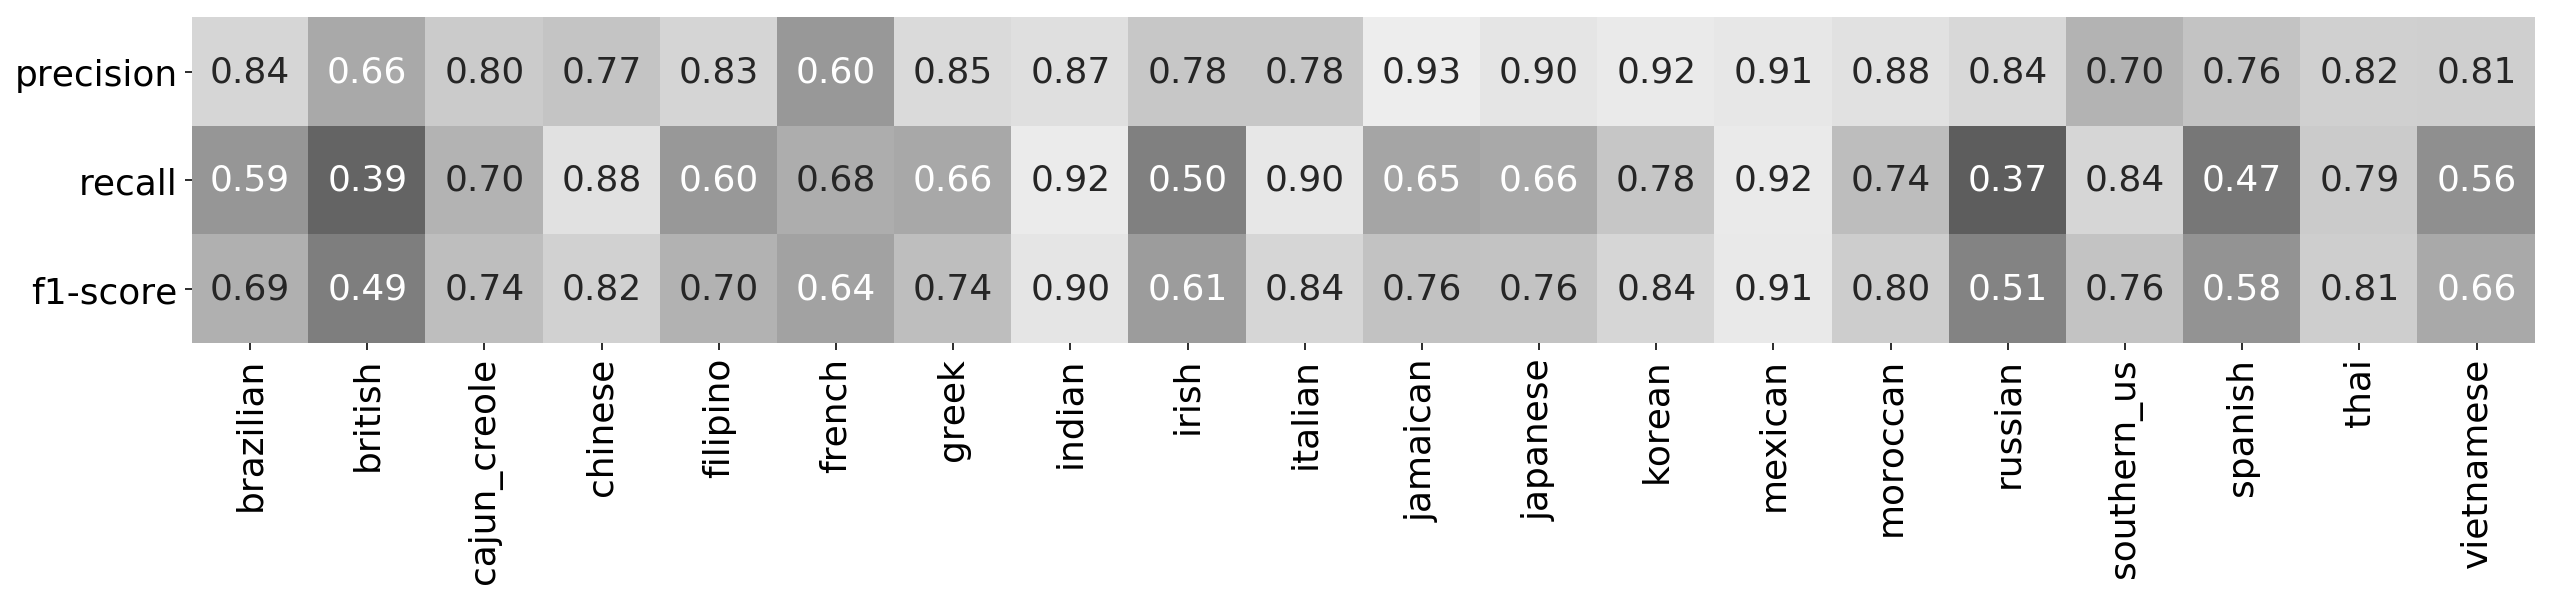

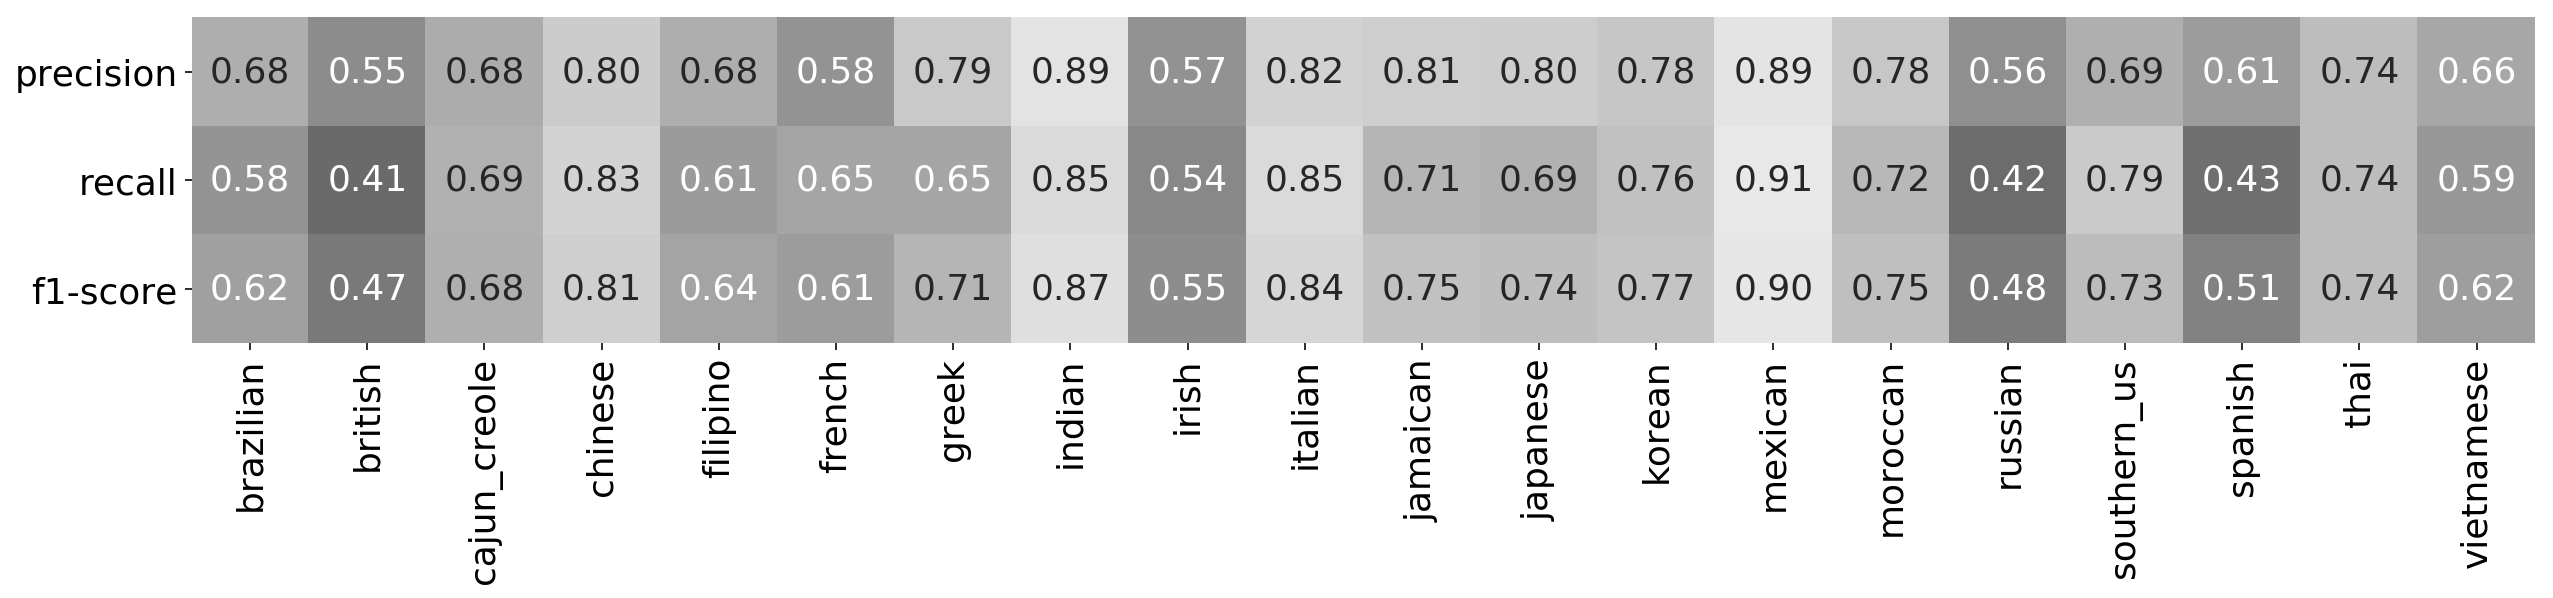

In [6]:
for report in prf:
    clf_report=pd.DataFrame(report).round(3)
    clf_report = clf_report.drop('support', axis=0).drop(['accuracy','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
    plt.figure(figsize=(21,3))
    sns.heatmap(clf_report, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
    plt.xticks(fontsize=18, rotation=90)
    plt.yticks(fontsize=18, rotation=0)
    plt.show()

In [7]:
with open('adaboost_prf.pkl', 'rb') as f:
    adaboost_prf = pickle.load(f)

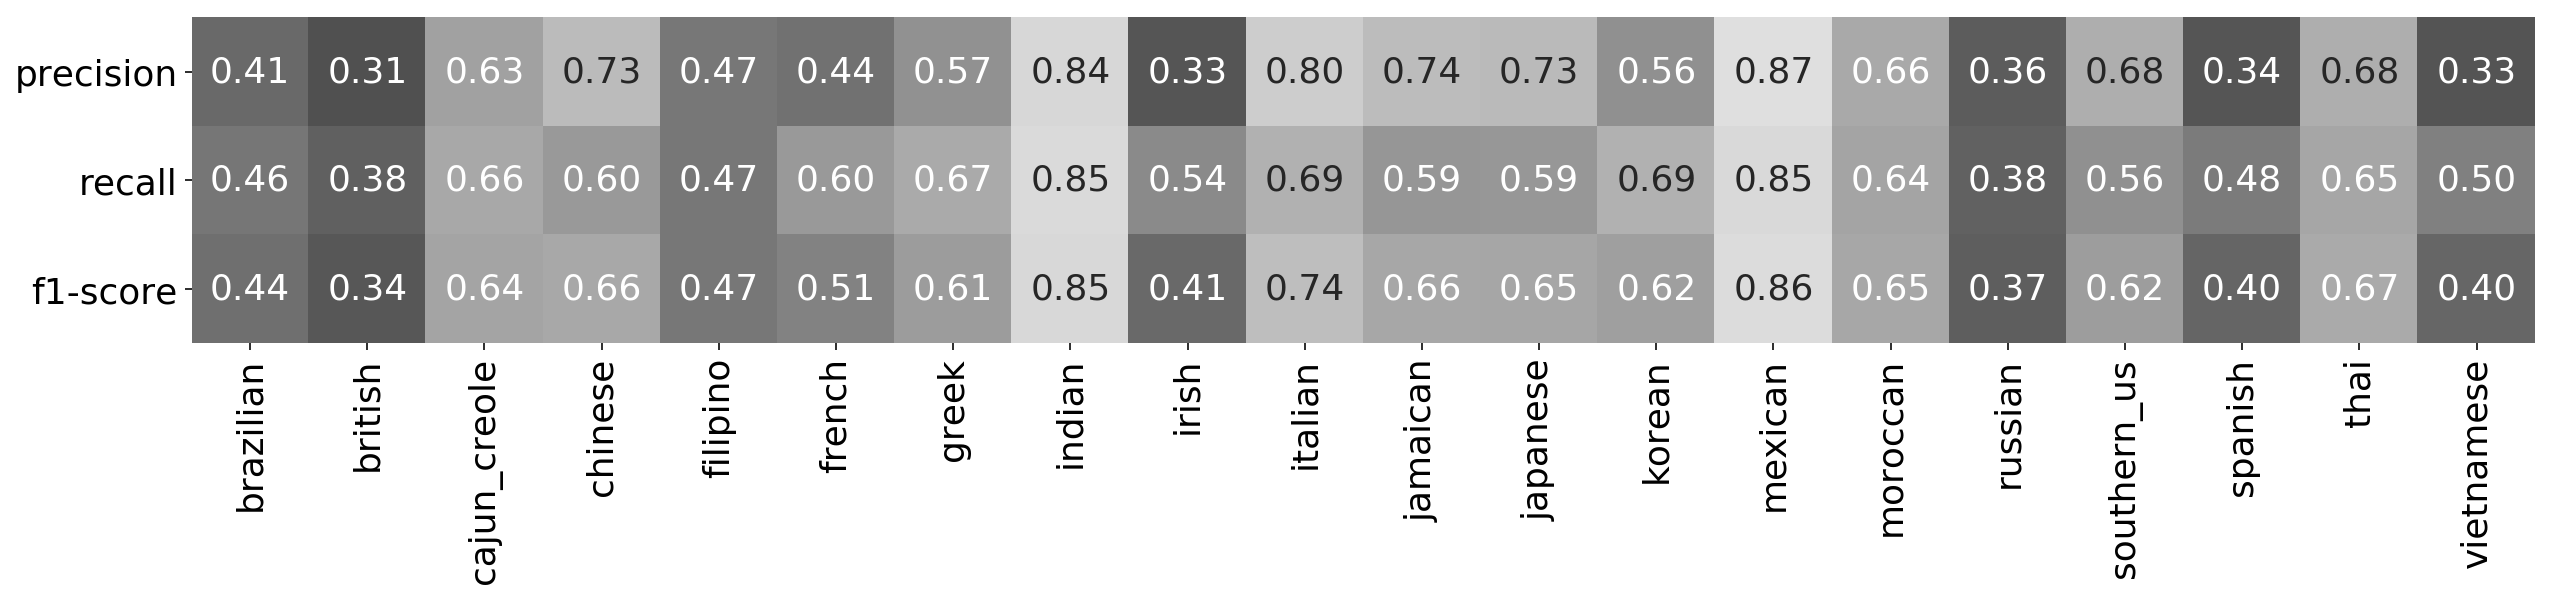

In [8]:
clf_report=pd.DataFrame(adaboost_prf).round(3)
clf_report = clf_report.drop('support', axis=0).drop(['accuracy','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
plt.figure(figsize=(21,3))
sns.heatmap(clf_report, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18, rotation=0)
plt.show()

In [10]:
bayes_acc = np.array([0.72695303, 0.7379995 , 0.72649573, 0.7298453 , 0.72933182])
svm_acc = np.array([0.7979151 , 0.80459915, 0.7991453 , 0.79398818, 0.80432868])
ann_acc = np.array([0.77179101, 0.77770797, 0.7731272 , 0.77122375, 0.77865861])
adaboost_acc = np.array([0.66327556, 0.6759236 , 0.6690548 , 0.66985285, 0.66037498])

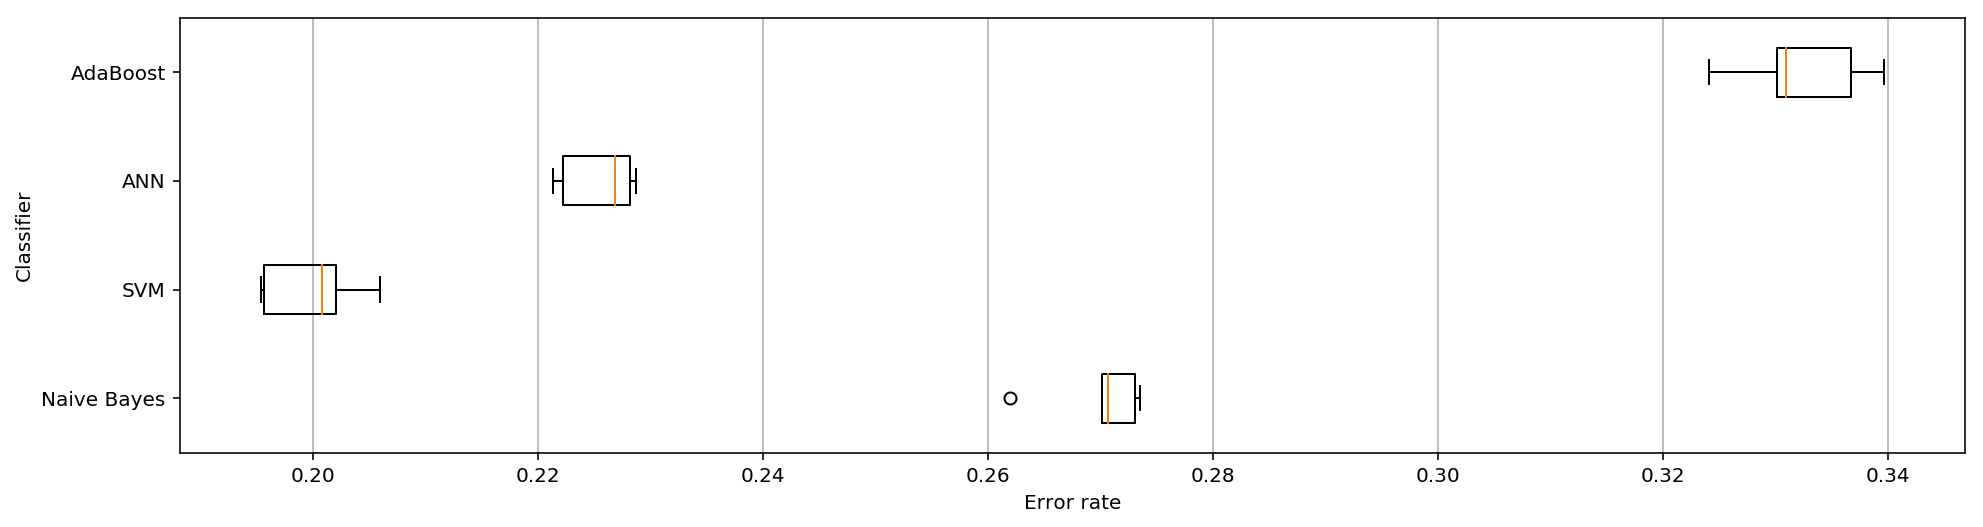

In [16]:
acc = np.vstack((bayes_acc, svm_acc, ann_acc, adaboost_acc)).T
# for acc in [bayes_acc, svm_acc, ann_acc]:
plt.figure(figsize=(16,4))
plt.boxplot(1-acc, labels=['Naive Bayes', 'SVM', 'ANN', 'AdaBoost'],vert=False)
plt.xlabel('Error rate')
plt.ylabel('Classifier')
plt.grid(axis='x')
plt.show()